In [1]:
import numpy as np
import pylab as plt
import pandas as pd
import sys
sys.path.append("../")
from simulate import gen_bursts, run_search, analyse_and_plot
from utils import *
from plotting import set_size

%matplotlib inline

Simulated bursts

In [2]:
np.random.seed(1996)
bursts, name = gen_bursts(
    mu_params=[1650, 250],
    sigma_params=[300, 250],
    mu_dist="norm",
    sigma_dist="norm",
    N=50000,
    alpha=-1.5,
    E_min_log=37,
    E_max_log=42,
    save=False,
)

detected, detected_in_band_df, Es = run_search(
    bursts,
    fstart=1050,
    fend=1450,
    fluence_threshold=0.2,
    in_band_sig=3,
    ret="all",
    distance=949,
)

original_E = Es["original_E"]
detected_snr_E = Es["detected_snr_E"]
detected_fit_E = Es["detected_fit_E"]
detected_in_band_E = Es["detected_in_band_E"]

FAST FRB121102 bursts

In [3]:
fast_121102 = pd.read_csv('../fastbursts.csv')
fast_energy = fluence_to_energy(fast_121102['fluence']/1000, fast_121102['bw']*1000, 
                                    distance=949)

Arecibo FRB121102 bursts

In [4]:
arecibo_121102 = pd.read_csv('../all_bursts_bary.csv')

arecibo_121102 = arecibo_121102[arecibo_121102['use_fluence']]
arecibo_121102 = arecibo_121102[arecibo_121102['fit_method'] == 'mcmc']

# Selecting in-band bursts
m1 = (arecibo_121102['$\mu_f$ (MHz)'] - 1.0 * arecibo_121102["$\sigma_f$ (MHz)"] > 974)
m2 = (arecibo_121102['$\mu_f$ (MHz)'] + 1.0 * arecibo_121102["$\sigma_f$ (MHz)"] < 1774)
mask = m1 & m2
arecibo_121102_in = arecibo_121102[mask]
arecibo_121102_all = arecibo_121102

arecibo_energy_in = fluence_to_energy(arecibo_121102_in['$S$ (Jy ms)']/1000, 
                                      arecibo_121102_in['$\sigma_f$ (MHz)']*2.355,
                                      distance=949)
arecibo_energy_all = fluence_to_energy(arecibo_121102_all['$S$ (Jy ms)']/1000, 
                                       arecibo_121102_all['$\sigma_f$ (MHz)']*2.355,
                                       distance=949)

Plot energy distributions

/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


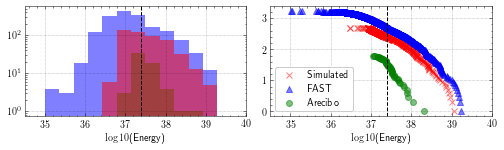

In [5]:
bins = np.linspace(35, 40, 15)
with plt.style.context(["science", "grid"]):
    fig, ax = plt.subplots(1, 2, sharex=True, figsize=set_size(width="full", 
                                                               subplots=(1, 2)))
    ax[0].hist(np.log10(fast_energy), bins=bins, color='b',# density=True,
               alpha=0.5, label='FAST')
    ax[0].hist(np.log10(arecibo_energy_in), bins=bins, color='g',# density=True, 
               alpha=0.5, label='Arecibo')
    ax[0].hist(np.log10(detected_snr_E), bins=bins, color='r', 
               alpha=0.5, label='Simulated')
    ax[0].axvline(x=np.log10(2.5) + 37, ymin=0, ymax=1000, 
                  color='k', linestyle='--')

    Es_bw = np.sort(detected_snr_E)
    Ns_bw = np.linspace(len(Es_bw) - 1, 0, len(Es_bw))
    ax[1].scatter(np.log10(Es_bw), np.log10(Ns_bw), c='r', 
                  marker='x', alpha=0.5, label='Simulated')


    Es_bw = np.sort(fast_energy)
    Ns_bw = np.linspace(len(Es_bw) - 1, 0, len(Es_bw))
    ax[1].scatter(np.log10(Es_bw), np.log10(Ns_bw), c='b', 
                  marker='^', alpha=0.5, label='FAST')

    Es_bw = np.sort(arecibo_energy_in)
    Ns_bw = np.linspace(len(Es_bw) - 1, 0, len(Es_bw))
    ax[1].scatter(np.log10(Es_bw), np.log10(Ns_bw), c='g', 
                  marker='o', alpha=0.5, label='Arecibo')
    ax[1].legend()

    ax[1].axvline(x=np.log10(2.5) + 37, ymin=0, ymax=1000, 
                  color='k', linestyle='--')


    ax[0].set_yscale('log')
    ax[0].set_xlabel(r'$\log10$(Energy)')
    ax[1].set_xlabel(r'$\log10$(Energy)')
    ax[1].set_xlim([34.5, 40])
    plt.tight_layout()
    plt.savefig('121102_energies.pdf', bbox_inches='tight', dpi=300)